In [2]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt

# 设置中文字体（可选，适用于中文环境）
plt.rcParams["font.family"] = ["Microsoft YaHei"]  # 例如 'Microsoft YaHei'
plt.rcParams["axes.unicode_minus"] = False  # 防止负号显示问题

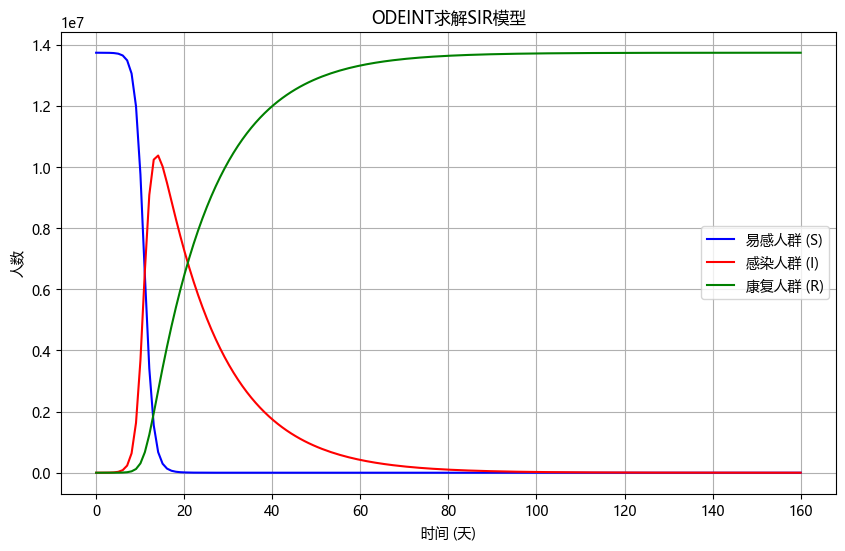

In [3]:
# SIR模型的微分方程
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    # 每个群体的变化率
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]


# 总人口，N
N = 13739000  # 武汉市总人口
# 初始感染者和恢复者人数
I0, R0 = 170, 0
# 初始易感者人数
S0 = N - I0 - R0
# 初始条件向量
y0 = [S0, I0, R0]
# 时间网格（天数）
t = np.linspace(0, 160, 160)

# 接触率beta和恢复率gamma（单位：1/天）
beta, gamma = 1.1, 1 / 14
# beta: 有效接触率 = 传播概率 * 接触率
# gamma: 恢复率 = 1/传染期

# 求解微分方程组
result = odeint(sir_model, y0, t, args=(N, beta, gamma))

# 检查求解是否成功
if result is None:
    raise ValueError("ODEINT求解失败！")

S, I, R = result.T

# 绘制SIR模型的结果
plt.figure(figsize=(10, 6))
plt.plot(t, S, "b", label="易感人群 (S)")
plt.plot(t, I, "r", label="感染人群 (I)")
plt.plot(t, R, "g", label="康复人群 (R)")
plt.xlabel("时间 (天)")
plt.ylabel("人数")
plt.title("ODEINT求解SIR模型")
plt.legend()
plt.grid(True)

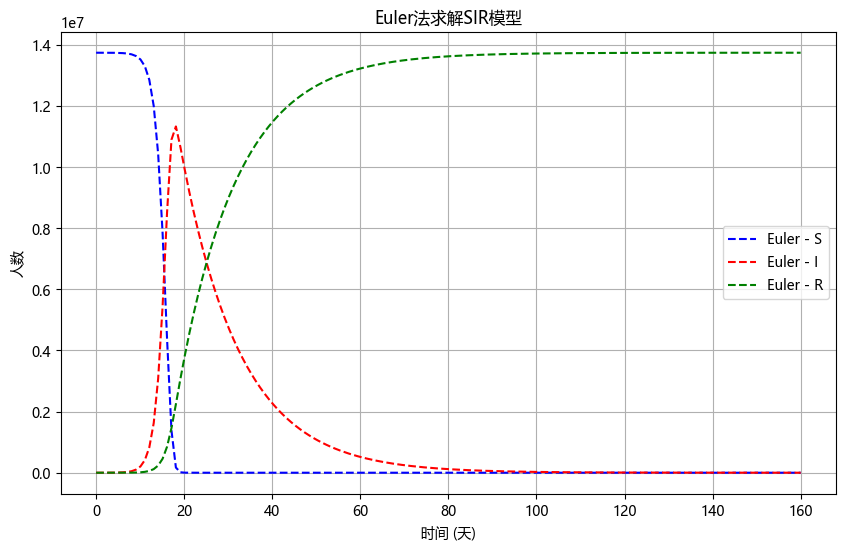

In [4]:
# Euler法求解SIR模型
def euler_sir_model(y0, t, N, beta, gamma):
    S = np.zeros(len(t))
    I = np.zeros(len(t))
    R = np.zeros(len(t))
    S[0], I[0], R[0] = y0
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        dSdt = -beta * S[i - 1] * I[i - 1] / N
        dIdt = beta * S[i - 1] * I[i - 1] / N - gamma * I[i - 1]
        dRdt = gamma * I[i - 1]
        S[i] = S[i - 1] + dSdt * dt
        I[i] = I[i - 1] + dIdt * dt
        R[i] = R[i - 1] + dRdt * dt
    return S, I, R


# 使用Euler方法求解
S_euler, I_euler, R_euler = euler_sir_model(y0, t, N, beta, gamma)

# 检验求解是否成功
if S_euler is None or I_euler is None or R_euler is None:
    raise ValueError("Euler法求解失败！")

# 绘制Euler法求解的结果
plt.figure(figsize=(10, 6))
plt.plot(t, S_euler, "b--", label="Euler - S")
plt.plot(t, I_euler, "r--", label="Euler - I")
plt.plot(t, R_euler, "g--", label="Euler - R")
plt.xlabel("时间 (天)")
plt.ylabel("人数")
plt.title("Euler法求解SIR模型")
plt.legend()
plt.grid(True)

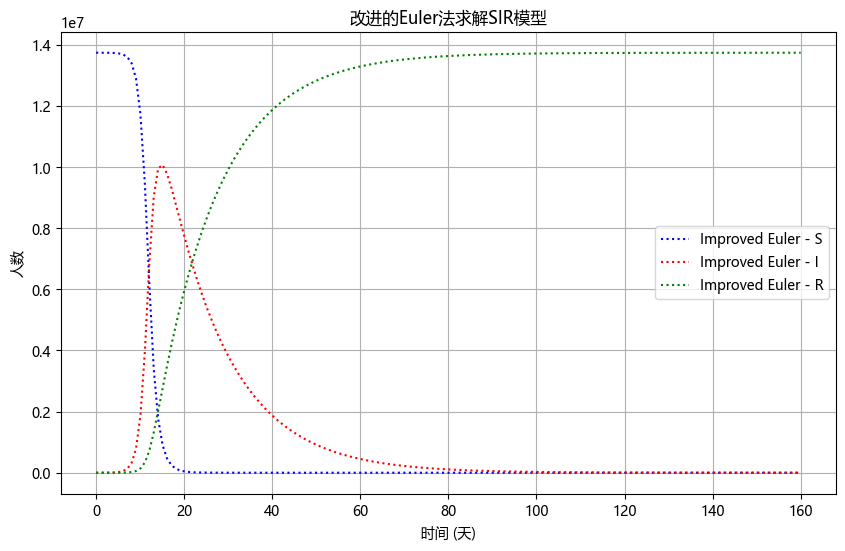

In [5]:
# 改进的Euler法求解SIR模型
def improved_euler_sir_model(y0, t, N, beta, gamma):
    S = np.zeros(len(t))
    I = np.zeros(len(t))
    R = np.zeros(len(t))
    S[0], I[0], R[0] = y0
    dt = t[1] - t[0]

    for i in range(1, len(t)):
        # 预测（Euler 预测步）
        dSdt = -beta * S[i - 1] * I[i - 1] / N
        dIdt = beta * S[i - 1] * I[i - 1] / N - gamma * I[i - 1]
        dRdt = gamma * I[i - 1]

        S_predict = S[i - 1] + dSdt * dt
        I_predict = I[i - 1] + dIdt * dt
        R_predict = R[i - 1] + dRdt * dt

        # 校正（使用预测值计算新的斜率）
        dSdt_corrected = -beta * S_predict * I_predict / N
        dIdt_corrected = beta * S_predict * I_predict / N - gamma * I_predict
        dRdt_corrected = gamma * I_predict

        # 计算最终值（取平均斜率）
        S[i] = S[i - 1] + (dSdt + dSdt_corrected) / 2 * dt
        I[i] = I[i - 1] + (dIdt + dIdt_corrected) / 2 * dt
        R[i] = R[i - 1] + (dRdt + dRdt_corrected) / 2 * dt

    return S, I, R


# 使用改进的Euler方法求解
S_improved_euler, I_improved_euler, R_improved_euler = improved_euler_sir_model(
    y0, t, N, beta, gamma
)

# 检验求解是否成功
if S_improved_euler is None or I_improved_euler is None or R_improved_euler is None:
    raise ValueError("改进的Euler法求解失败！")

# 绘制改进的Euler法求解的结果
plt.figure(figsize=(10, 6))
plt.plot(t, S_improved_euler, "b:", label="Improved Euler - S")
plt.plot(t, I_improved_euler, "r:", label="Improved Euler - I")
plt.plot(t, R_improved_euler, "g:", label="Improved Euler - R")
plt.xlabel("时间 (天)")
plt.ylabel("人数")
plt.title("改进的Euler法求解SIR模型")
plt.legend()
plt.grid(True)

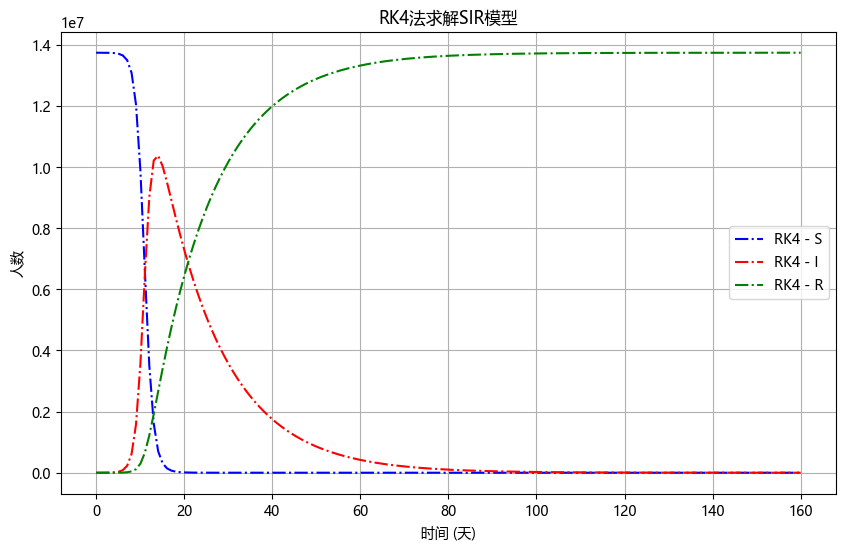

In [6]:
# RK4法求解SIR模型
def rk4_sir_model(y0, t, N, beta, gamma):
    S = np.zeros(len(t))
    I = np.zeros(len(t))
    R = np.zeros(len(t))
    S[0], I[0], R[0] = y0
    dt = t[1] - t[0]

    for i in range(1, len(t)):
        # 当前状态
        s, ii, r = S[i - 1], I[i - 1], R[i - 1]

        # 第一阶段
        k1_s = -beta * s * ii / N
        k1_i = beta * s * ii / N - gamma * ii
        k1_r = gamma * ii

        # 第二阶段
        s2 = s + k1_s * dt / 2
        i2 = ii + k1_i * dt / 2
        r2 = r + k1_r * dt / 2

        k2_s = -beta * s2 * i2 / N
        k2_i = beta * s2 * i2 / N - gamma * i2
        k2_r = gamma * i2

        # 第三阶段
        s3 = s + k2_s * dt / 2
        i3 = ii + k2_i * dt / 2
        r3 = r + k2_r * dt / 2

        k3_s = -beta * s3 * i3 / N
        k3_i = beta * s3 * i3 / N - gamma * i3
        k3_r = gamma * i3

        # 第四阶段
        s4 = s + k3_s * dt
        i4 = ii + k3_i * dt
        r4 = r + k3_r * dt

        k4_s = -beta * s4 * i4 / N
        k4_i = beta * s4 * i4 / N - gamma * i4
        k4_r = gamma * i4

        # 更新状态
        S[i] = s + (k1_s + 2 * k2_s + 2 * k3_s + k4_s) * dt / 6
        I[i] = ii + (k1_i + 2 * k2_i + 2 * k3_i + k4_i) * dt / 6
        R[i] = r + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) * dt / 6

    return S, I, R


# 使用RK4方法求解
S_rk4, I_rk4, R_rk4 = rk4_sir_model(y0, t, N, beta, gamma)

# 检验求解是否成功
if S_rk4 is None or I_rk4 is None or R_rk4 is None:
    raise ValueError("RK4法求解失败！")

# 绘制RK4法求解的结果
plt.figure(figsize=(10, 6))
plt.plot(t, S_rk4, "b-.", label="RK4 - S")
plt.plot(t, I_rk4, "r-.", label="RK4 - I")
plt.plot(t, R_rk4, "g-.", label="RK4 - R")
plt.xlabel("时间 (天)")
plt.ylabel("人数")
plt.title("RK4法求解SIR模型")
plt.legend()
plt.grid(True)

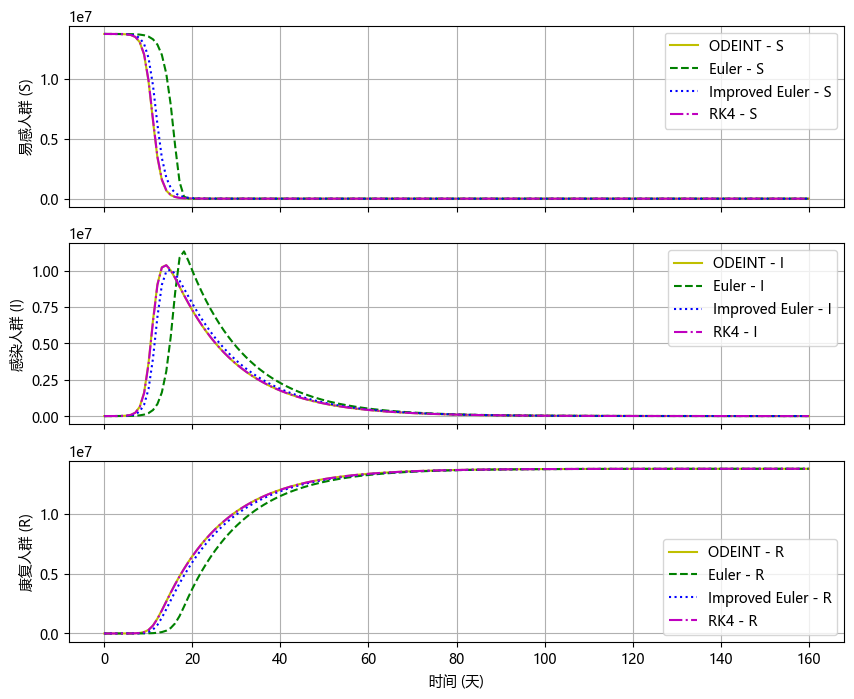

In [7]:
# 绘制SIR模型不同方法求解的对比结果
# 创建一个带有三个子图的图表
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# SIR模型比较 (ODEINT vs Euler vs Improved Euler vs RK4)
methods = ["ODEINT", "Euler", "Improved Euler", "RK4"]
colors = ["y", "g", "b", "m"]
linestyles = ["-", "--", ":", "-."]

# 第一子图：易感人群(S)
axes[0].plot(t, S, color=colors[0], linestyle=linestyles[0], label=f"{methods[0]} - S")
axes[0].plot(
    t, S_euler, color=colors[1], linestyle=linestyles[1], label=f"{methods[1]} - S"
)
axes[0].plot(
    t,
    S_improved_euler,
    color=colors[2],
    linestyle=linestyles[2],
    label=f"{methods[2]} - S",
)
axes[0].plot(
    t, S_rk4, color=colors[3], linestyle=linestyles[3], label=f"{methods[3]} - S"
)
axes[0].set_ylabel("易感人群 (S)")
axes[0].legend()
axes[0].grid(True)

# 第二子图：感染人群(I)
axes[1].plot(t, I, color=colors[0], linestyle=linestyles[0], label=f"{methods[0]} - I")
axes[1].plot(
    t, I_euler, color=colors[1], linestyle=linestyles[1], label=f"{methods[1]} - I"
)
axes[1].plot(
    t,
    I_improved_euler,
    color=colors[2],
    linestyle=linestyles[2],
    label=f"{methods[2]} - I",
)
axes[1].plot(
    t, I_rk4, color=colors[3], linestyle=linestyles[3], label=f"{methods[3]} - I"
)
axes[1].set_ylabel("感染人群 (I)")
axes[1].legend()
axes[1].grid(True)

# 第三子图：康复人群(R)
axes[2].plot(t, R, color=colors[0], linestyle=linestyles[0], label=f"{methods[0]} - R")
axes[2].plot(
    t, R_euler, color=colors[1], linestyle=linestyles[1], label=f"{methods[1]} - R"
)
axes[2].plot(
    t,
    R_improved_euler,
    color=colors[2],
    linestyle=linestyles[2],
    label=f"{methods[2]} - R",
)
axes[2].plot(
    t, R_rk4, color=colors[3], linestyle=linestyles[3], label=f"{methods[3]} - R"
)
axes[2].set_xlabel("时间 (天)")
axes[2].set_ylabel("康复人群 (R)")
axes[2].legend()
axes[2].grid(True)

In [8]:
############################################
# 以ODEINT结果为基准，计算其他方法的误差
# 计算绝对误差
S_euler_error = np.abs(S - S_euler)
I_euler_error = np.abs(I - I_euler)
R_euler_error = np.abs(R - R_euler)

S_improved_euler_error = np.abs(S - S_improved_euler)
I_improved_euler_error = np.abs(I - I_improved_euler)
R_improved_euler_error = np.abs(R - R_improved_euler)

S_rk4_error = np.abs(S - S_rk4)
I_rk4_error = np.abs(I - I_rk4)
R_rk4_error = np.abs(R - R_rk4)

# 计算相对误差 (百分比)
# 防止除零错误，添加一个很小的值
epsilon = 1e-10
S_euler_rel_error = S_euler_error / (np.abs(S) + epsilon) * 100
I_euler_rel_error = I_euler_error / (np.abs(I) + epsilon) * 100
R_euler_rel_error = R_euler_error / (np.abs(R) + epsilon) * 100

S_improved_euler_rel_error = S_improved_euler_error / (np.abs(S) + epsilon) * 100
I_improved_euler_rel_error = I_improved_euler_error / (np.abs(I) + epsilon) * 100
R_improved_euler_rel_error = R_improved_euler_error / (np.abs(R) + epsilon) * 100

S_rk4_rel_error = S_rk4_error / (np.abs(S) + epsilon) * 100
I_rk4_rel_error = I_rk4_error / (np.abs(I) + epsilon) * 100
R_rk4_rel_error = R_rk4_error / (np.abs(R) + epsilon) * 100

# 计算最大误差和平均误差
max_errors = {
    "Euler": {
        "S": np.max(S_euler_error),
        "I": np.max(I_euler_error),
        "R": np.max(R_euler_error),
    },
    "Improved Euler": {
        "S": np.max(S_improved_euler_error),
        "I": np.max(I_improved_euler_error),
        "R": np.max(R_improved_euler_error),
    },
    "RK4": {
        "S": np.max(S_rk4_error),
        "I": np.max(I_rk4_error),
        "R": np.max(R_rk4_error),
    },
}

avg_errors = {
    "Euler": {
        "S": np.mean(S_euler_error),
        "I": np.mean(I_euler_error),
        "R": np.mean(R_euler_error),
    },
    "Improved Euler": {
        "S": np.mean(S_improved_euler_error),
        "I": np.mean(I_improved_euler_error),
        "R": np.mean(R_improved_euler_error),
    },
    "RK4": {
        "S": np.mean(S_rk4_error),
        "I": np.mean(I_rk4_error),
        "R": np.mean(R_rk4_error),
    },
}

# 打印最大误差和平均误差
print("最大绝对误差:")
for method, errors in max_errors.items():
    print(f"{method}: S={errors['S']:.2f}, I={errors['I']:.2f}, R={errors['R']:.2f}")

print("\n平均绝对误差:")
for method, errors in avg_errors.items():
    print(f"{method}: S={errors['S']:.2f}, I={errors['I']:.2f}, R={errors['R']:.2f}")

最大绝对误差:
Euler: S=10443294.26, I=8615609.42, R=3328515.63
Improved Euler: S=2974665.38, I=2635851.46, R=664212.92
RK4: S=129429.04, I=112477.59, R=27463.52

平均绝对误差:
Euler: S=350812.29, I=522693.16, R=350528.72
Improved Euler: S=84029.47, I=116799.87, R=80113.36
RK4: S=3318.58, I=4790.52, R=3217.12


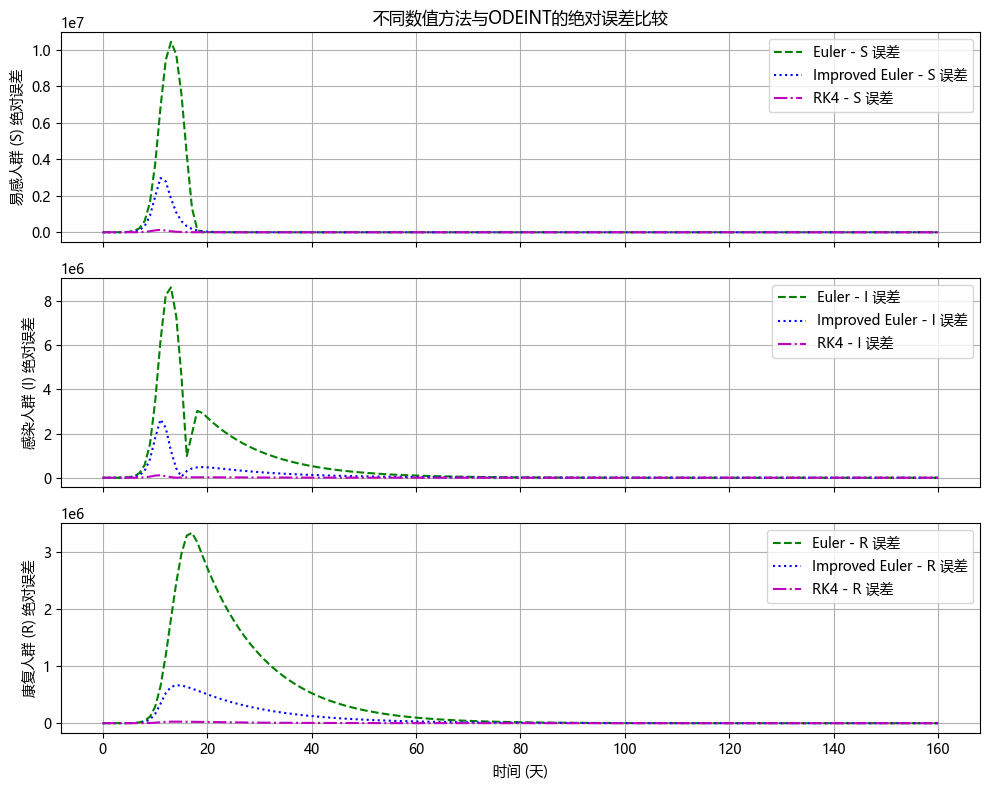

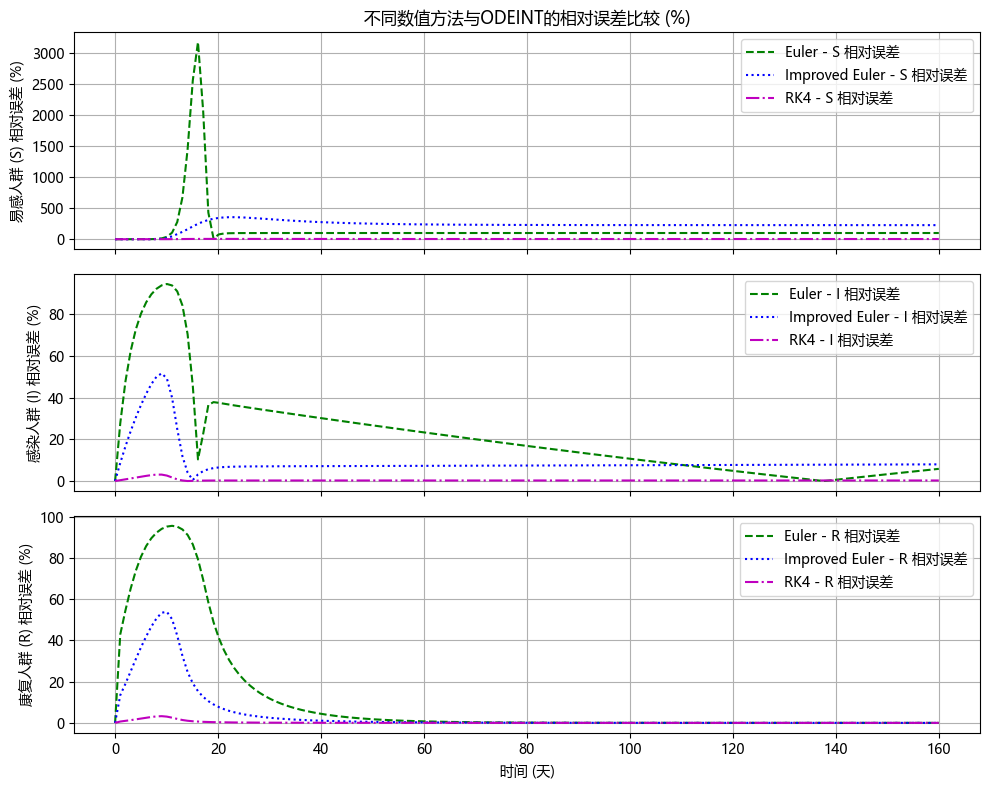

In [9]:
# 创建三个子图展示绝对误差
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# 第一子图：易感人群(S)误差
axes[0].plot(
    t,
    S_euler_error,
    color=colors[1],
    linestyle=linestyles[1],
    label=f"{methods[1]} - S 误差",
)
axes[0].plot(
    t,
    S_improved_euler_error,
    color=colors[2],
    linestyle=linestyles[2],
    label=f"{methods[2]} - S 误差",
)
axes[0].plot(
    t,
    S_rk4_error,
    color=colors[3],
    linestyle=linestyles[3],
    label=f"{methods[3]} - S 误差",
)
axes[0].set_ylabel("易感人群 (S) 绝对误差")
axes[0].legend()
axes[0].grid(True)
axes[0].set_title("不同数值方法与ODEINT的绝对误差比较")

# 第二子图：感染人群(I)误差
axes[1].plot(
    t,
    I_euler_error,
    color=colors[1],
    linestyle=linestyles[1],
    label=f"{methods[1]} - I 误差",
)
axes[1].plot(
    t,
    I_improved_euler_error,
    color=colors[2],
    linestyle=linestyles[2],
    label=f"{methods[2]} - I 误差",
)
axes[1].plot(
    t,
    I_rk4_error,
    color=colors[3],
    linestyle=linestyles[3],
    label=f"{methods[3]} - I 误差",
)
axes[1].set_ylabel("感染人群 (I) 绝对误差")
axes[1].legend()
axes[1].grid(True)

# 第三子图：康复人群(R)误差
axes[2].plot(
    t,
    R_euler_error,
    color=colors[1],
    linestyle=linestyles[1],
    label=f"{methods[1]} - R 误差",
)
axes[2].plot(
    t,
    R_improved_euler_error,
    color=colors[2],
    linestyle=linestyles[2],
    label=f"{methods[2]} - R 误差",
)
axes[2].plot(
    t,
    R_rk4_error,
    color=colors[3],
    linestyle=linestyles[3],
    label=f"{methods[3]} - R 误差",
)
axes[2].set_xlabel("时间 (天)")
axes[2].set_ylabel("康复人群 (R) 绝对误差")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()

# 创建三个子图展示相对误差(%)
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# 第一子图：易感人群(S)相对误差
axes[0].plot(
    t,
    S_euler_rel_error,
    color=colors[1],
    linestyle=linestyles[1],
    label=f"{methods[1]} - S 相对误差",
)
axes[0].plot(
    t,
    S_improved_euler_rel_error,
    color=colors[2],
    linestyle=linestyles[2],
    label=f"{methods[2]} - S 相对误差",
)
axes[0].plot(
    t,
    S_rk4_rel_error,
    color=colors[3],
    linestyle=linestyles[3],
    label=f"{methods[3]} - S 相对误差",
)
axes[0].set_ylabel("易感人群 (S) 相对误差 (%)")
axes[0].legend()
axes[0].grid(True)
axes[0].set_title("不同数值方法与ODEINT的相对误差比较 (%)")

# 第二子图：感染人群(I)相对误差
axes[1].plot(
    t,
    I_euler_rel_error,
    color=colors[1],
    linestyle=linestyles[1],
    label=f"{methods[1]} - I 相对误差",
)
axes[1].plot(
    t,
    I_improved_euler_rel_error,
    color=colors[2],
    linestyle=linestyles[2],
    label=f"{methods[2]} - I 相对误差",
)
axes[1].plot(
    t,
    I_rk4_rel_error,
    color=colors[3],
    linestyle=linestyles[3],
    label=f"{methods[3]} - I 相对误差",
)
axes[1].set_ylabel("感染人群 (I) 相对误差 (%)")
axes[1].legend()
axes[1].grid(True)

# 第三子图：康复人群(R)相对误差
axes[2].plot(
    t,
    R_euler_rel_error,
    color=colors[1],
    linestyle=linestyles[1],
    label=f"{methods[1]} - R 相对误差",
)
axes[2].plot(
    t,
    R_improved_euler_rel_error,
    color=colors[2],
    linestyle=linestyles[2],
    label=f"{methods[2]} - R 相对误差",
)
axes[2].plot(
    t,
    R_rk4_rel_error,
    color=colors[3],
    linestyle=linestyles[3],
    label=f"{methods[3]} - R 相对误差",
)
axes[2].set_xlabel("时间 (天)")
axes[2].set_ylabel("康复人群 (R) 相对误差 (%)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()

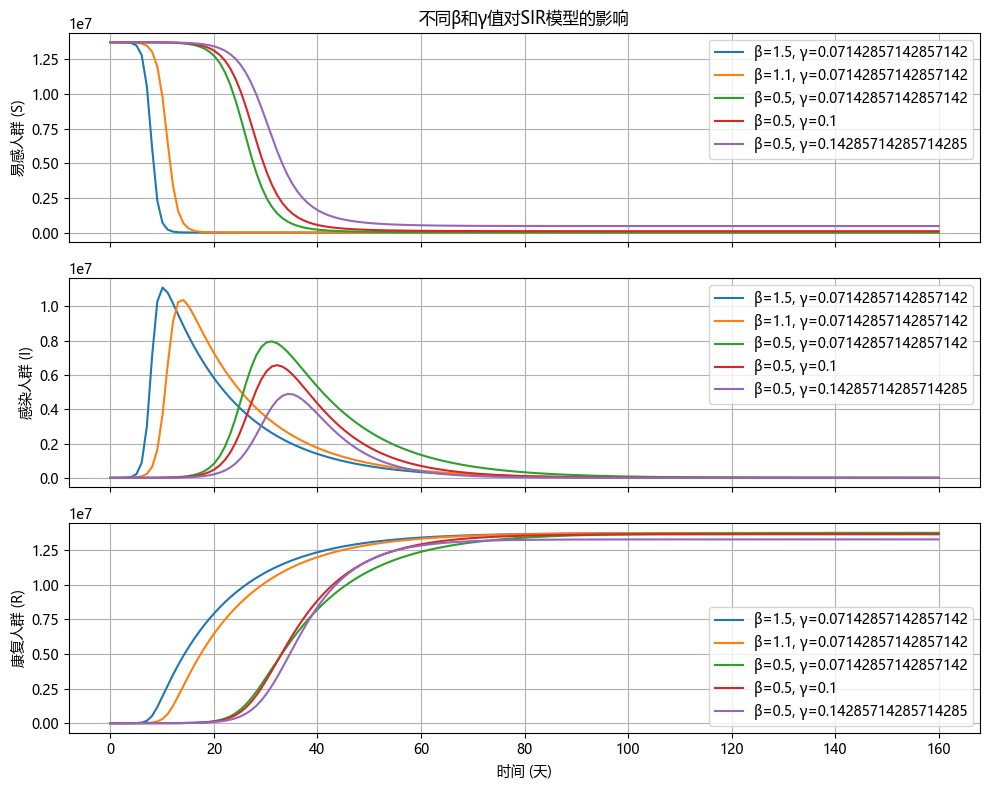

In [10]:
# 使用ODEINT方法比较不同的β和γ造成的影响
# β和γ的值
betas = [1.5, 1.1, 0.5, 0.5, 0.5]
gammas = [1 / 14, 1 / 14, 1 / 14, 1 / 10, 1 / 7]

# 求解
results = []
for beta, gamma in zip(betas, gammas):
    result = odeint(sir_model, y0, t, args=(N, beta, gamma))
    results.append(result)

# 创建三个子图来显示不同β和γ值的影响
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# 第一子图：易感人群(S)
for i, result in enumerate(results):
    S, I, R = result.T
    axes[0].plot(t, S, label=f"β={betas[i]}, γ={gammas[i]}")
axes[0].set_ylabel("易感人群 (S)")
axes[0].legend()
axes[0].grid(True)
axes[0].set_title("不同β和γ值对SIR模型的影响")

# 第二子图：感染人群(I)
for i, result in enumerate(results):
    S, I, R = result.T
    axes[1].plot(t, I, label=f"β={betas[i]}, γ={gammas[i]}")
axes[1].set_ylabel("感染人群 (I)")
axes[1].legend()
axes[1].grid(True)

# 第三子图：康复人群(R)
for i, result in enumerate(results):
    S, I, R = result.T
    axes[2].plot(t, R, label=f"β={betas[i]}, γ={gammas[i]}")
axes[2].set_xlabel("时间 (天)")
axes[2].set_ylabel("康复人群 (R)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()

plt.grid(True)
plt.show()